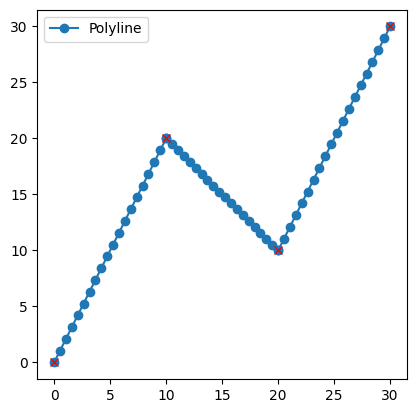

In [1]:
import ezdxf
import numpy as np
import matplotlib.pyplot as plt

def extract_polyline_points(dxf_file, num_points_per_edge=20):
    doc = ezdxf.readfile(dxf_file)
    msp = doc.modelspace()
    polylines_data = []

    for entity in msp.query("LWPOLYLINE POLYLINE"):
        # 只取XY坐标，避免解包错误
        vertices = list(entity.get_points("xy"))
        points = []

        # 遍历每条边，生成离散点
        for i in range(len(vertices) - (0 if entity.closed else 1)):
            x1, y1 = vertices[i]
            x2, y2 = vertices[(i+1) % len(vertices)]
            xs = np.linspace(x1, x2, num_points_per_edge)
            ys = np.linspace(y1, y2, num_points_per_edge)
            points.extend(list(zip(xs, ys)))

        polylines_data.append({
            "vertices": vertices,
            "points": points,
            "closed": entity.closed
        })

    return polylines_data



def visualize_polylines(polylines_data):
    """
    使用Matplotlib可视化折线的离散点。
    """
    fig, ax = plt.subplots()
    for poly in polylines_data:
        xs, ys = zip(*poly["points"])
        ax.plot(xs, ys, 'o-', label="Polyline")

        # 只取顶点的前两个分量
        vx = [v[0] for v in poly["vertices"]]
        vy = [v[1] for v in poly["vertices"]]
        ax.plot(vx, vy, 'rx')  # 顶点标记

    ax.set_aspect('equal')
    ax.legend()
    plt.show()

# 示例调用
polylines = extract_polyline_points("poly.dxf", num_points_per_edge=20)
visualize_polylines(polylines)